# Laboratorio 1

## Inversión pasiva y activa

### Objetivo del trabajo
Evaluar y elaborar estrategias de inversión a un cierto plazo determinado, los tipos de inversiones son: **pasiva** y **activa**. En cuanto a la *pasiva* esta no tendrá movimiento en cuanto a compra o venta de titulos, ya que estos permaneceran en el mismo numero de principio a fin; en cambio la *activa* tendrá rebalanceo a partir de ciertos criterios y a partir de cierta fecha.

### Introducción

### Dependencias 

### Paquetes python

pandas==1.4.4



pandas-datareader==0.10.0



yfinance==0.1.74



numpy==1.23.2



matplotlib==3.5.3

### Arhivos a usar
Desktop/Visual studio code/files/2020_01_2022_07 (1)/NAFTRAC_20200131.csv

### Instalar paquetes

[*********************100%***********************]  29 of 29 completed


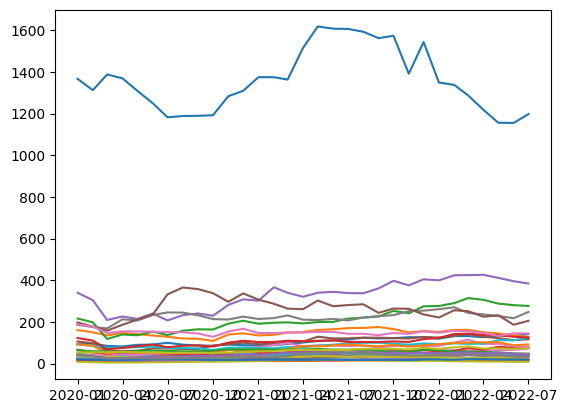

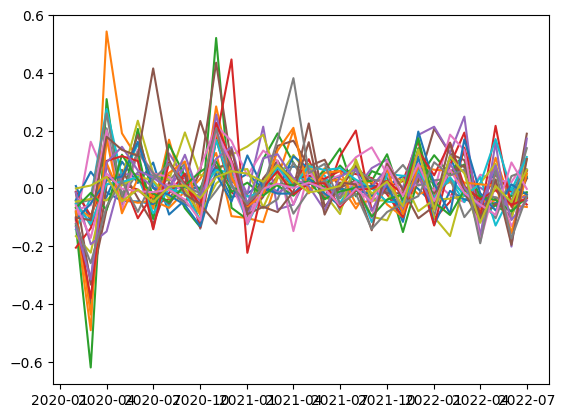

[*********************100%***********************]  29 of 29 completed


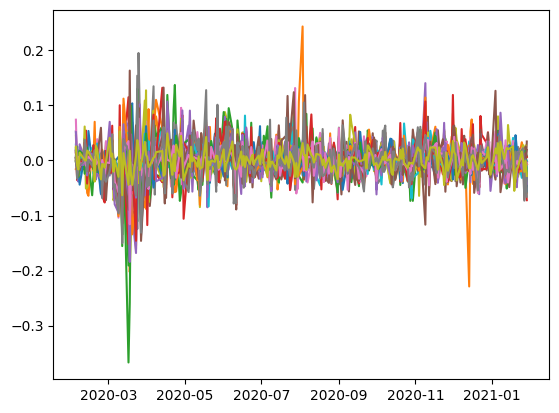

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import data3 as d3

In [ ]:
yahoodata=yf.download(["AMXL.MX","PINFRA.MX","LABB.MX","CUERVO.MX","BOLSAA.MX","LIVEPOLC-1.MX","MEGACPO.MX","BBAJIOO.MX","KOFUBL.MX","ALSEA.MX","FEMSAUBD.MX","GCARSOA1.MX","ALFAA.MX","ORBIA.MX","GRUMAB.MX","PE&OLES.MX","GMEXICOB.MX","GFNORTEO.MX","WALMEX.MX","GFINBURO.MX","CEMEXCPO.MX","TLEVISACPO.MX","GAPB.MX","ELEKTRA.MX","ASURB.MX","KIMBERA.MX","BIMBOA.MX","OMAB.MX","AC.MX"],start="2020-01-01",end="2022-07-29",interval="1mo")
data=pd.DataFrame(yahoodata).drop(["Volume","Low","High","Adj Close","Open"],axis=1).dropna()
data
yahoodata2=yf.download(["AMXL.MX","PINFRA.MX","LABB.MX","CUERVO.MX","BOLSAA.MX","LIVEPOLC-1.MX","MEGACPO.MX","BBAJIOO.MX","KOFUBL.MX","ALSEA.MX","FEMSAUBD.MX","GCARSOA1.MX","ALFAA.MX","ORBIA.MX","GRUMAB.MX","PE&OLES.MX","GMEXICOB.MX","GFNORTEO.MX","WALMEX.MX","GFINBURO.MX","CEMEXCPO.MX","TLEVISACPO.MX","GAPB.MX","ELEKTRA.MX","ASURB.MX","KIMBERA.MX","BIMBOA.MX","OMAB.MX","AC.MX"],start="2020-01-31",end="2022-07-29",interval="1d")
data2=pd.DataFrame(yahoodata2).drop(["Volume","Low","High","Adj Close","Open"],axis=1).dropna()
data2

Basicamente lo que tenemos en la celda de arriba son los precios mnesuales y diarios para cada estrategia, con la particularidad de que en la pasiva tomaremos en cuenta para el calculo de nuestros capitales el primer precio

### Resolución Inversión pasiva
El proceso fue el siguiente:
1. Asignar capital a cada acción según su peso 
2. Asignar el cash
3. Calcular el numero de titulos a comprar por cada acción en base a su capital asignado 
4. Redondear hacia abajo el numero de titulos y ejecutar compras (tomando en cuenta la comisión en el primer mes)
5. Asignar la diferencia entre capital asignado y capital usado a "cash"
6. Determinar rendimientos mensuales
7. Determinar el nuevo capital de cada mes en base a los rendimientos inmediatos anteriores 
8. El nuevo capital incluye lo que tenemos de cash
9. Sumar rendimientos acumulados mensualmente



In [3]:
d3.df_pasiva

,Fecha,Capital,Rendimientos,Rendimientos acumulados
0,2020-01-01,1.000000e+06,0.000000,0.000000
1,2020-02-01,9.377848e+05,-247.753859,-247.753859
2,2020-03-01,7.980116e+05,-388.717542,-636.471401
3,2020-04-01,8.432856e+05,152.151579,-484.319822
4,2020-05-01,8.399585e+05,-38.510057,-522.829879
5,2020-06-01,8.753429e+05,76.260396,-446.569484
6,2020-07-01,8.627448e+05,-27.765323,-474.334806
7,2020-08-01,8.614905e+05,72.363566,-401.971240
8,2020-09-01,8.767400e+05,3.590683,-398.380558
9,2020-10-01,8.655623e+05,-95.964192,-494.344750


### Resolución inversión activa

El proceso fue el siguiente:
1. Obtener rendimientos diraios logaritmicos para periodo de un año
2. Crear un portafolio eficiente en media varianza

In [5]:
d3.rendimientos_logaritmicos

Close                                                     \
               AC.MX  ALFAA.MX  ALSEA.MX   AMXL.MX  ASURB.MX BBAJIOO.MX   
Date                                                                      
2020-02-04  0.016297 -0.000705  0.000545  0.018621  0.007271   0.003519   
2020-02-05 -0.013035 -0.009922  0.008470 -0.006274  0.018687  -0.003679   
2020-02-06  0.001395 -0.027439 -0.003032 -0.013304 -0.008163  -0.002246   
2020-02-07 -0.000093 -0.022207 -0.019716 -0.002554 -0.007876  -0.012607   
2020-02-10 -0.003771  0.008200  0.004415 -0.016114  0.004299  -0.004238   
...              ...       ...       ...       ...       ...        ...   
2021-01-25  0.015639  0.033186 -0.003041  0.022146  0.008703  -0.006380   
2021-01-26 -0.000312  0.023462 -0.008741 -0.011012  0.022147  -0.006823   
2021-01-27 -0.014904  0.002172 -0.009261 -0.015342 -0.002038  -0.013788   
2021-01-28  0.004010 -0.010905  0.015825 -0.012730 -0.010865  -0.023550   
2021-01-29 -0.019999 -0.058708  0.007819 -0.027419 -0.007475   0.034515   

                                                      ...                      \
           BIMBOA.MX BOLSAA.MX CEMEXCPO.MX CUERVO.MX  ... KOFUBL.MX   LABB.MX   
Date                                                  ...                       
2020-02-04  0.014099 -0.002074    0.045053  0.028807  ...  0.019517  0.004464   
2020-02-05 -0.008936 -0.011834   -0.024850 -0.002509  ...  0.004841 -0.015261   
2020-02-06 -0.025333  0.009987    0.000000 -0.033777  ...  0.008269 -0.009543   
2020-02-07  0.001207 -0.006027    0.005148 -0.023957  ...  0.010782 -0.043871   
2020-02-10 -0.005896  0.014542   -0.007085  0.015986  ... -0.001622 -0.005262   
...              ...       ...         ...       ...  ...       ...       ...   
2021-01-25  0.002132  0.009643    0.007267 -0.031505  ... -0.007165  0.004568   
2021-01-26 -0.006411 -0.002349   -0.004031 -0.009946  ...  0.015566 -0.003196   
2021-01-27 -0.036385 -0.003641   -0.044599 -0.042356  ... -0.031600  0.017226   
2021-01-28 -0.008684 -0.009918    0.027490 -0.029954  ...  0.003426 -0.001799   
2021-01-29 -0.040947 -0.003256   -0.034270 -0.000229  ... -0.019159 -0.056496   

                                                                              \
           LIVEPOLC-1.MX MEGACPO.MX   OMAB.MX  ORBIA.MX PE&OLES.MX PINFRA.MX   
Date                                                                           
2020-02-04     -0.015463   0.005151  0.005100  0.051457   0.013039  0.001371   
2020-02-05     -0.017103   0.025501 -0.003050  0.002457  -0.018884 -0.008031   
2020-02-06     -0.028372  -0.029944  0.006711 -0.008571  -0.016083  0.006489   
2020-02-07      0.001917   0.017102 -0.006642 -0.007777   0.000725 -0.006933   
2020-02-10     -0.000798   0.010920  0.001041 -0.008057   0.002223 -0.003633   
...                  ...        ...       ...       ...        ...       ...   
2021-01-25     -0.019497   0.018347  0.010798 -0.014969   0.001391  0.009031   
2021-01-26      0.001982   0.003444  0.002887  0.020124   0.016299 -0.005396   
2021-01-27      0.014217   0.000264 -0.022156 -0.011419  -0.071018 -0.032878   
2021-01-28     -0.009203   0.017690  0.012638 -0.001301   0.004396 -0.017564   
2021-01-29     -0.007149  -0.037990  0.006218 -0.042324   0.019222 -0.003693   

                                    
           TLEVISACPO.MX WALMEX.MX  
Date                                
2020-02-04      0.008424  0.025125  
2020-02-05     -0.032908 -0.008958  
2020-02-06     -0.014265 -0.016348  
2020-02-07     -0.008458  0.014208  
2020-02-10     -0.003128  0.004188  
...                  ...       ...  
2021-01-25      0.012739  0.016293  
2021-01-26      0.022192  0.001142  
2021-01-27     -0.072940 -0.020759  
2021-01-28      0.001814 -0.000999  
2021-01-29     -0.065869 -0.028052  

[250 rows x 29 columns]

In [6]:
d3.volatilidad_diaria

Close  AC.MX            0.016875
       ALFAA.MX         0.041616
       ALSEA.MX         0.041026
       AMXL.MX          0.020758
       ASURB.MX         0.029662
       BBAJIOO.MX       0.029563
       BIMBOA.MX        0.028035
       BOLSAA.MX        0.030054
       CEMEXCPO.MX      0.035228
       CUERVO.MX        0.022882
       ELEKTRA.MX       0.008537
       FEMSAUBD.MX      0.022395
       GAPB.MX          0.035642
       GCARSOA1.MX      0.032634
       GFINBURO.MX      0.032106
       GFNORTEO.MX      0.031595
       GMEXICOB.MX      0.026224
       GRUMAB.MX        0.022303
       KIMBERA.MX       0.022306
       KOFUBL.MX        0.019048
       LABB.MX          0.028175
       LIVEPOLC-1.MX    0.029314
       MEGACPO.MX       0.022164
       OMAB.MX          0.035926
       ORBIA.MX         0.031048
       PE&OLES.MX       0.037694
       PINFRA.MX        0.023536
       TLEVISACPO.MX    0.036502
       WALMEX.MX        0.018470
dtype: float64